<a href="https://colab.research.google.com/github/Trantracy/Kickstarter-projects-/blob/master/Data_Analysis_Kickstarter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Example - Kickstarter projects dataset

In [0]:
# Import libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [0]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Read the data
data = pd.read_csv('/content/drive/My Drive/Student Files/FTMLE - Tonga/Data/ks-projects-201801.csv')

## Step 1: Exploration Ideas
Audience: Project owners who are considering to use Kickstarter

Big Question: 
- What are the most lucrative categories on Kickstarter?
- What factors need to be considered to have a successful project?


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Overview

In [0]:
# Have an overview of the dataset
# Your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [0]:
# Show ten random rows
# Your code here
data.sample(10)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
364957,929396626,persistence of gravity,Narrative Film,Film & Video,USD,2011-05-06,12000.0,2011-04-06 07:21:51,0.0,failed,0,US,0.00,0.00,12000.00
279140,489835380,Northern Spark 2014: Light up Minneapolis on J...,Public Art,Art,USD,2014-05-09,20000.0,2014-04-08 05:51:51,20790.0,successful,413,US,20790.00,20790.00,20000.00
148645,1755604739,The Gamer's Notebook Collection,Product Design,Design,AUD,2014-03-03,1000.0,2014-02-19 07:47:48,462.0,failed,16,AU,418.91,421.88,913.16
345634,830671590,Smonta il televisore e accendi un'idea (Canceled),Performance Art,Art,EUR,2015-10-16,800.0,2015-09-30 09:01:49,0.0,canceled,0,IT,0.00,0.00,908.80
53174,1270767076,The Rolling Home book,Publishing,Publishing,GBP,2015-11-28,10000.0,2015-10-29 19:59:27,24721.0,successful,790,GB,37834.64,37426.57,15139.59
214287,2091889772,Ultimate Destiny DiceBox,Tabletop Games,Games,USD,2017-03-09,1500.0,2017-02-07 19:11:37,105.0,canceled,3,US,145.00,105.00,1500.00
262914,407102716,Hiking Mount Timpanogos Safely,Publishing,Publishing,USD,2015-04-09,1500.0,2015-03-10 19:13:04,18.0,undefined,0,"N,0""",NaN,18.00,1500.00
246914,325744857,Love PB: 100 dreams and a film!,Shorts,Film & Video,USD,2011-01-01,4500.0,2010-12-01 20:45:02,35.0,failed,3,US,35.00,35.00,4500.00
195244,1994209174,EarthPlug - Tiny Yet Mighty Power Saving iPhon...,Product Design,Design,USD,2012-11-23,8000.0,2012-10-09 20:47:58,589.0,failed,62,US,589.00,589.00,8000.00
320068,699996931,Make Music with Me!,Indie Rock,Music,USD,2014-06-05,6300.0,2014-05-06 14:46:46,7330.0,successful,92,US,7330.00,7330.00,6300.00


## Step 2: Cleaning the data

### Check data duplication

In [0]:
# Check if ID column is unique
# Your code here
data['ID'].nunique() == data['ID'].count()

True

### Drop unnecessary columns 
- __ID__: This column is not very helpful
- __currency__, __pledged__, __goal__ & __usd pledged__: We don't need these since we will be using __usd_pledged_real__ and __usd_goal_read__ columns

In [0]:
# Delete unnecessary columns 
# Your code here
data.drop(columns = ['ID','currency','goal', 'pledged','usd pledged'], inplace = True)

### Handle missing data

In [0]:
# Check for missing data
# Your code here
data.isnull().sum()

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [0]:
# Show the missing values in the data 
# Your code here
data[data['name'].isnull()]

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
166851,NaN,Narrative Film,Film & Video,2012-02-29,2012-01-01 12:35:31,failed,1,US,100.00,200000.00
307234,NaN,Video Games,Games,2013-01-06,2012-12-19 23:57:48,failed,12,GB,316.05,3224.97
309991,NaN,Product Design,Design,2016-07-18,2016-06-18 05:01:47,suspended,0,US,0.00,2500.00
338931,NaN,Painting,Art,2011-12-05,2011-11-06 23:55:55,failed,5,US,220.00,35000.00


In [0]:
# Those missing values are in 'name' columns so it is safe to keep them
# However, it will might be a better idea if we give them a name, instead of NaN
# Your code here
data['name'].fillna('Unnamed', inplace = True)

### Handle errors

In [0]:
# Data with undefined state are error during data collection
# Your code here
data['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [0]:
# All of the projects with undefined states do not have any backer. Let's check that.
# Your code here
data[data['state'] == 'undefined'].sample(10)

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real
222716,Life In the Big Easy- A boy's life in Northern...,Publishing,Publishing,2015-03-26,2015-02-24 03:25:09,undefined,0,"N,0""",0.00,7500.00
111409,Help Me Create an Unforgettable Full-Length Al...,Music,Music,2015-11-28,2015-11-03 16:20:37,undefined,0,"N,0""",5145.00,5000.00
268877,"Pulse, Toronto Concerts 2015-2016",Music,Music,2015-10-01,2015-08-31 20:29:22,undefined,0,"N,0""",551.40,1744.84
26078,Chasing Tails - The Amberland Music Video,Music,Music,2014-12-22,2014-12-02 19:11:08,undefined,0,"N,0""",2431.37,2330.39
90555,Support Bristol Best's First Album & Art,Music,Music,2015-11-27,2015-10-14 05:20:51,undefined,0,"N,0""",51.00,2200.00
221074,Of Winter Full Length,Music,Music,2014-12-22,2014-11-22 04:50:20,undefined,0,"N,0""",281.23,1035.20
268797,Oakapella (HS acappella choir) wants to make a...,Music,Music,2015-01-16,2014-12-17 00:06:06,undefined,0,"N,0""",1526.00,1500.00
227865,Tommy Proulx's Live Shows,Music,Music,2016-04-16,2016-03-15 23:06:56,undefined,0,"N,0""",6051.00,6000.00
292106,Going The Distance,Film & Video,Film & Video,2014-10-30,2014-09-30 01:16:32,undefined,0,"N,0""",325.00,4000.00
285586,Rocktavo Album 2015,Music,Music,2015-05-22,2015-04-21 20:17:14,undefined,0,"N,0""",4100.00,4000.00


In [0]:
# Therefore it is safe to replace them with 'failed'
# Your code here
data['state'].replace("undefined", "failed", inplace = True)

In [0]:
# We also have some problems in the country column
# There is a weird value N,0". This is also an error during collecting data
# Your code here
data['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [0]:
# Let's drop these values
# Your code here
data = data[data['country'] != 'N,0"']

### Handle Datetime columns
You will need to research on your own

In [0]:
# Convert deadline and launched columns to datetime dtype
# Your code here
data['deadline'] = pd.to_datetime(data['deadline'])
data['launched'] = pd.to_datetime(data['launched'])

In [0]:
# Calculate the duration of the projects
# Your code here
data['duration'] = data['deadline'] - data['launched']

In [0]:
# There are some projects with year = 1970, these are errors in data collection
# First, let's create a new column with the year when the project was launched
# Your code here
data['launched_year'] = data['launched'].dt.year
data['launched_year'].min()

1970

In [0]:
# Drop values with year < 2008, which is when Kickstarter was found
# Your code here
data = data[data['launched_year'] >= 2008]

## Exploratory Data Analysis

In [0]:
top10_count = data['category'].value_counts().head(10)

top10_data = data[data['category'].isin(top10_count.index)]

top10_groupby = top10_data.groupby('category').sum().loc[top10_count.index]

top10_groupby['avg_pledged'] = top10_groupby['usd_pledged_real'] / top10_groupby['backers']

# Reverse the sorting order
top10_count = top10_count[::-1]
top10_groupby = top10_groupby[::-1]

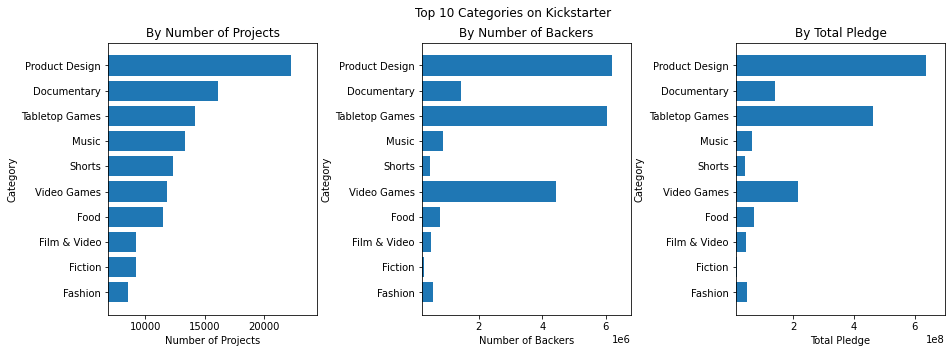

In [0]:
# Plot
fig, ax = plt.subplots(1, 3, figsize = (15,5))
fig.suptitle("Top 10 Categories on Kickstarter")

# Top 10 Categories by number of projects
ax[0].barh(top10_count.index, top10_count.values)
ax[0].set(xlim = [min(top10_count.values)* 0.8, max(top10_count.values)* 1.1],
          xlabel = 'Number of Projects',
          ylabel = 'Category',
          title = 'By Number of Projects')

# Number of backers of top 10 categories
ax[1].barh(top10_groupby.index, top10_groupby['backers'].values)
ax[1].set(xlim = [min(top10_groupby['backers'].values)* 0.8, max(top10_groupby['backers'].values)* 1.1],
          xlabel = 'Number of Backers',
          ylabel = 'Category',
          title = 'By Number of Backers')

# Total Pledged of top 10 categories
ax[2].barh(top10_groupby.index, top10_groupby['usd_pledged_real'].values)
ax[2].set(xlim = [min(top10_groupby['usd_pledged_real'].values)* 0.8, max(top10_groupby['usd_pledged_real'].values)* 1.1],
          xlabel = 'Total Pledge',
          ylabel = 'Category',
          title = 'By Total Pledge')

# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5)

plt.show()

In [0]:
state_data = data[data['state'] != 'live']
state_data['state_grouped'] = state_data['state'].apply(lambda x: x if x == 'successful' else 'failed')

# Top 10 categories data
top10_data = state_data[state_data['category'].isin(top10_count.index)]

In [0]:
# Plot
plt.subplots(1, 2, figsize = (10,5))
plt.suptitle("Success Rate of Projects of Kickstarter")

# Success Rate of Kickstarters Projects
plt.subplot(121)
plt.pie(state_count.values, 
        labels = state_count.index,
        autopct='%1.1f%%')

plt.title("Success Rate of Kickstarter Projects")

# Success Rate of Top 10 Projects
plt.subplot(122)
sns.countplot(y = 'category', 
              hue = 'state_grouped', 
              data = top10_data, 
              order = top10_count.index[::-1])

plt.title("Success Rate of Top 10 Projects")

# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5)

plt.show()

In [0]:
# Number of Projects in Top 5 Categories
top5_categories = top10_count.index[5:][::-1]

fig, ax = plt.subplots(1, 5, figsize = (20,3))
fig.suptitle("Number of Projects in Top 5 Categories")

for ax_index, category in enumerate(top5_categories):

  plot_data = data[(data['category'] == category) & (data['launched_year'] != 2018)].copy() # Exclude 2018 since it is incomplete
  plot_count = plot_data['launched_year'].value_counts().sort_index(ascending = True)

  ax[ax_index].plot(plot_count.index, plot_count.values)
  ax[ax_index].set(ylim = [0, 5000], title = category)
  
# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5, top = 0.8)

plt.show()

In [0]:
# No. of backers of Top 5 Categories
METRIC = 'backers'
top5_categories = top10_count.index[5:][::-1]

fig, ax = plt.subplots(1, 5, figsize = (20,3))
fig.suptitle(METRIC + ' of Top 5 Categories')

for ax_index, category in enumerate(top5_categories):

  plot_data = data[(data['category'] == category) & (data['launched_year'] != 2018)].copy() # Exclude 2018 since it is incomplete
  plot_groupby = plot_data.groupby('launched_year').sum()

  ax[ax_index].plot(plot_groupby.index, plot_groupby[METRIC].values)
  ax[ax_index].set(ylim = [0,1700000], title = category)
  
# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5, top = 0.8)

plt.show()

In [0]:
# No. of Backers of Top 5 Categories
METRIC = 'usd_pledged_real'
top5_categories = top10_count.index[5:][::-1]

fig, ax = plt.subplots(1, 5, figsize = (20,3))
fig.suptitle(METRIC + ' of Top 5 Categories')

for ax_index, category in enumerate(top5_categories):

  plot_data = data[(data['category'] == category) & (data['launched_year'] != 2018)].copy() # Exclude 2018 since it is incomplete
  plot_groupby = plot_data.groupby('launched_year').sum()

  ax[ax_index].plot(plot_groupby.index, plot_groupby[METRIC].values)
  ax[ax_index].set(ylim = [0,170000000], title = category)
  
# Adjust the space between subplots
plt.subplots_adjust(wspace = 0.5, top = 0.8)

plt.show()

### What factors need to be considered to have successful projects?

__Month Launched__

In [0]:
state_data['launched_month']= state_data['launched'].dt.month

In [0]:
onehot_state = pd.get_dummies(state_data['state_grouped'], prefix='state')

In [0]:
data_onehot = pd.concat([state_data, onehot_state], axis = 1)

In [0]:
month_success = data_onehot.groupby('launched_month').sum()
month_success['success_rate'] = month_success['state_successful'] / (month_success['state_successful'] + month_success['state_failed'])  * 100
month_success = month_success[['success_rate']]

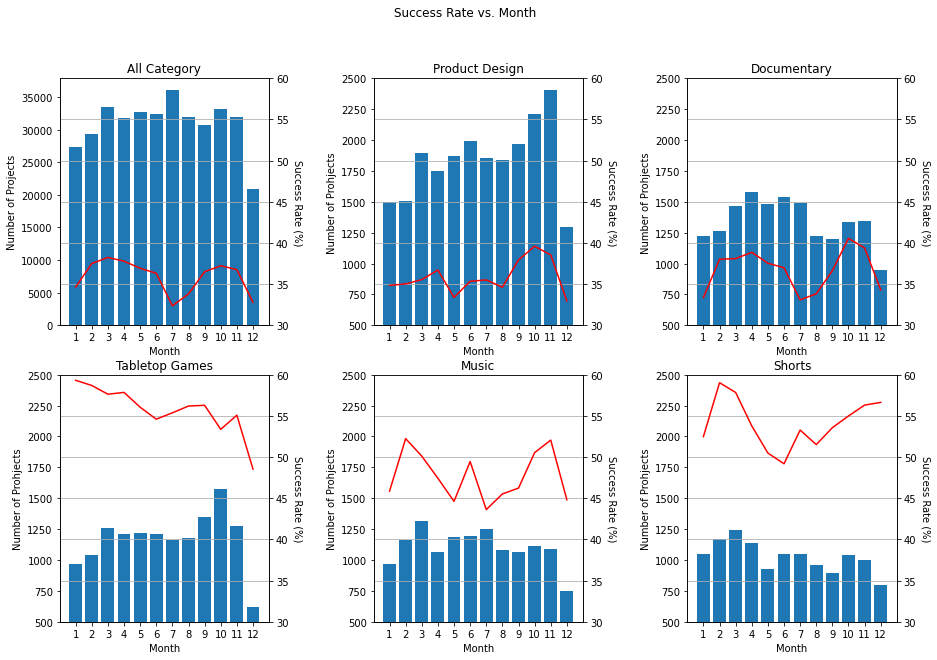

In [0]:
# Plot
fig, ax = plt.subplots(2, 3, figsize = (15,10))
fig.suptitle("Success Rate vs. Month")

# All Category
month_success = data_onehot.groupby('launched_month').sum()
month_count = data_onehot['launched_month'].value_counts().loc[month_success.index]
month_success['success_rate'] = month_success['state_successful'] / (month_success['state_successful'] + month_success['state_failed']) * 100
month_success = month_success[['success_rate']] 

# Success Rate


ax[0, 0].bar(month_count.index, month_count.values,)
ax[0, 0].set(xlabel = 'Month',
             ylabel = 'Number of Projects',
             xticks = month_success.index,
             title = 'All Category')

ax_twin = ax[0, 0].twinx() 
ax_twin.plot(month_success.index, month_success.values[:,-1], color = 'r')
ax_twin.set_ylabel('Success Rate (%)', rotation = 270, va = 'bottom')
ax_twin.set_ylim([30,60])
ax_twin.grid(None)


# Top 5 Category
cat_index = 0

for row in [0, 1]:
  for col in [0, 1, 2]:
    # Skip first ax
    if row == col == 0:
      pass
    else: 

      # Generate data for the category
      cat = top5_categories = top10_count.index[5:][::-1][cat_index]
      month_success = data_onehot[data_onehot['category'] == cat].groupby('launched_month').sum()
      month_count = data_onehot[data_onehot['category'] == cat]['launched_month'].value_counts().loc[month_success.index]
      month_success['success_rate'] = month_success['state_successful'] / (month_success['state_successful'] + month_success['state_failed']) * 100
      month_success = month_success[['success_rate']] 

      # Plot
      ax[row, col].bar(month_count.index, month_count.values)
      ax[row, col].set(ylim = [500,2500],
                       xlabel = 'Month',
                       ylabel = 'Number of Prohjects',
                       xticks = month_success.index,
                       title = cat)
      
      ax_twin = ax[row, col].twinx()

      ax_twin.plot(month_success.index, month_success.values[:,-1], color = 'r')
      ax_twin.set_ylabel('Success Rate (%)', rotation = 270, va = 'bottom')
      ax_twin.set_ylim([30,60])
      ax_twin.grid(None)
      
      # Move to next category
      cat_index += 1

plt.subplots_adjust(wspace = 0.5)

plt.show()

In [0]:
data_onehot['duration'] = data_onehot['duration'] // np.timedelta64(1, 'M')

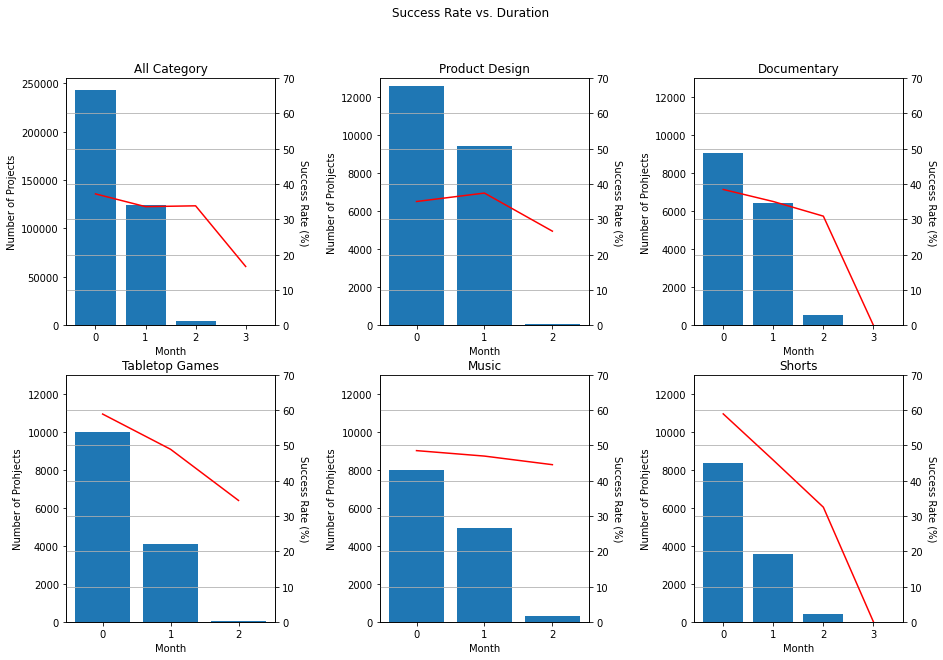

In [0]:
# Plot
fig, ax = plt.subplots(2, 3, figsize = (15,10))
fig.suptitle("Success Rate vs. Duration")

# All Category
duration_success = data_onehot.groupby('duration').sum()
duration_count = data_onehot['duration'].value_counts().loc[duration_success.index]
duration_success['success_rate'] = duration_success['state_successful'] / (duration_success['state_successful'] + duration_success['state_failed']) * 100
duration_success = duration_success[['success_rate']] 

# Success Rate


ax[0, 0].bar(duration_count.index, duration_count.values,)
ax[0, 0].set(xlabel = 'Month',
             ylabel = 'Number of Projects',
             xticks = duration_success.index,
             title = 'All Category')

ax_twin = ax[0, 0].twinx() 
ax_twin.plot(duration_success.index, duration_success.values[:,-1], color = 'r')
ax_twin.set_ylabel('Success Rate (%)', rotation = 270, va = 'bottom')
ax_twin.set_ylim([0,70])
ax_twin.grid(None)


# Top 5 Category
cat_index = 0

for row in [0, 1]:
  for col in [0, 1, 2]:
    # Skip first ax
    if row == col == 0:
      pass
    else: 

      # Generate data for the category
      cat = top5_categories = top10_count.index[5:][::-1][cat_index]
      duration_success = data_onehot[data_onehot['category'] == cat].groupby('duration').sum()
      duration_count = data_onehot[data_onehot['category'] == cat]['duration'].value_counts().loc[duration_success.index]
      duration_success['success_rate'] = duration_success['state_successful'] / (duration_success['state_successful'] + duration_success['state_failed']) * 100
      duration_success = duration_success[['success_rate']] 

      # Plot
      ax[row, col].bar(duration_count.index, duration_count.values)
      ax[row, col].set(ylim=[0,13000],
                       xlabel = 'Month',
                       ylabel = 'Number of Prohjects',
                       xticks = duration_success.index,
                       title = cat)
      
      ax_twin = ax[row, col].twinx()
      ax_twin.plot(duration_success.index, duration_success.values[:,-1], color = 'r')
      ax_twin.set_ylabel('Success Rate (%)', rotation = 270, va = 'bottom')
      ax_twin.set_ylim([0, 70])
      ax_twin.grid(None)
      
      # Move to next category
      cat_index += 1

plt.subplots_adjust(wspace = 0.5)

plt.show()

In [0]:
state_data['duration'] = state_data['duration'] // np.timedelta64(1, 'M')

In [0]:
state_data

,name,category,main_category,deadline,launched,state,backers,country,usd_pledged_real,usd_goal_real,duration,launched_year,launched_month
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,0,GB,0.0,1533.95,0,2015,8
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,15,US,2421.0,30000.00,0,2017,9
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,3,US,220.0,45000.00,0,2013,1
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17 03:24:11,failed,1,US,1.0,5000.00,0,2012,3
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04 08:35:03,canceled,14,US,1283.0,19500.00,0,2015,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,2014-10-17,2014-09-17 02:35:30,canceled,1,US,25.0,50000.00,0,2014,9
378657,The Tribe,Narrative Film,Film & Video,2011-07-19,2011-06-22 03:35:14,failed,5,US,155.0,1500.00,0,2011,6
378658,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,2010-08-16,2010-07-01 19:40:30,failed,1,US,20.0,15000.00,0,2010,7
378659,BioDefense Education Kit,Technology,Technology,2016-02-13,2016-01-13 18:13:53,failed,6,US,200.0,15000.00,0,2016,1


In [0]:
state_data.to_csv('kickstarter.csv', index = False)